# Decision Tree Example with the Moons data set from Scikit-Learn

From Scikit-Learn we'll be using the `Make_Moons` data set, which is a a simple toy dataset that makes two interleaving half circles, to visualize clustering and classification algorithms. In our case we'll be using the decision tree algorithm in Scikit-Learn.

 - [Training model](#Training-model)
 - [Decision boundaries](#Decision-boundaries)
 - [Grid search with cross validation](#Grid-search-with-cross-validation)

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import graphviz
import numpy as np
%matplotlib notebook

In [2]:
print(make_moons.__doc__)

Make two interleaving half circles

    A simple toy dataset to visualize clustering and classification
    algorithms. Read more in the :ref:`User Guide <sample_generators>`.

    Parameters
    ----------
    n_samples : int, optional (default=100)
        The total number of points generated.

    shuffle : bool, optional (default=True)
        Whether to shuffle the samples.

    noise : double or None (default=None)
        Standard deviation of Gaussian noise added to the data.

    random_state : int, RandomState instance or None (default)
        Determines random number generation for dataset shuffling and noise.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.

    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.

    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample.
    


In [3]:
mm = make_moons(n_samples=1000, shuffle=True, noise=0.4, random_state=42)

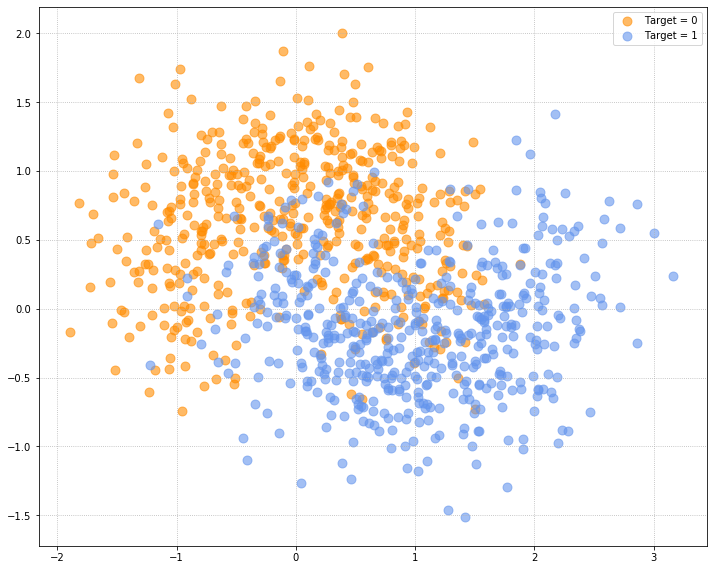

In [4]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
colors = ['darkorange', 'cornflowerblue']
labels = ['Target = 0', 'Target = 1']
axes.scatter(mm[0][mm[1] == 0][:, 0], mm[0][mm[1] == 0][:, 1], c=colors[0], alpha=0.6, s=80, marker='o', label=labels[0])
axes.scatter(mm[0][mm[1] == 1][:, 0], mm[0][mm[1] == 1][:, 1], c=colors[1], alpha=0.6, s=80, marker='o', label=labels[1])
axes.legend(loc='best')
plt.tight_layout(True)
plt.grid(linestyle=':');

## Training model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(mm[0], mm[1], test_size=0.3, random_state=42)

In [6]:
print(f'X_train.shape: {X_train.shape}\nX_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}\ny_test.shape: {y_test.shape}')

X_train.shape: (700, 2)
X_test.shape: (300, 2)
y_train.shape: (700,)
y_test.shape: (300,)


In [7]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [8]:
dot_data = export_graphviz(tree_clf, out_file=None, feature_names=['X', 'Y'], rounded=True, filled=True)
graph = graphviz.Source(dot_data)

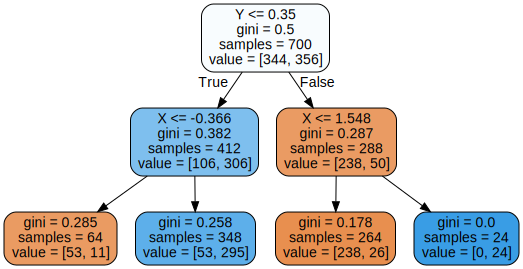

In [9]:
graph

Another way to represent the decision tree is to use the Scikit-Learn `plot_tree` method. Most of the options for `export_graphviz` are the same for `plot_tree`.

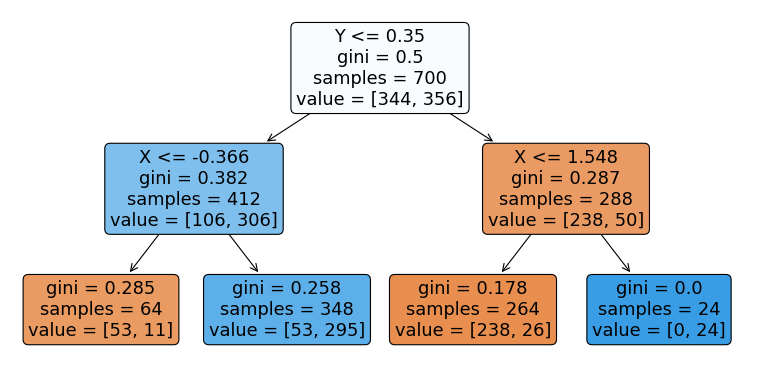

In [10]:
plt.figure(figsize=(12, 6), dpi=80)
plot_tree(tree_clf.fit(X_train, y_train), fontsize=16, filled=True, rounded=True, feature_names=['X', 'Y']);

## Decision boundaries

In [11]:
def plot_decision_boundary(clf, X, y):
    axes=[X[:, 0].min(), X[:, 0].max(), X[:, 1].min(), X[:, 1].max()]
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['darkorange', 'cornflowerblue'])
    plt.contourf(x1, x2, y_pred, alpha=0.1, cmap=custom_cmap)
    plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker='o', color='darkorange', s=80, label="Target = 0", alpha=0.6)
    plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker='o', color='cornflowerblue', s=80, label="Target = 1", alpha=0.6)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc="best", fontsize=14)

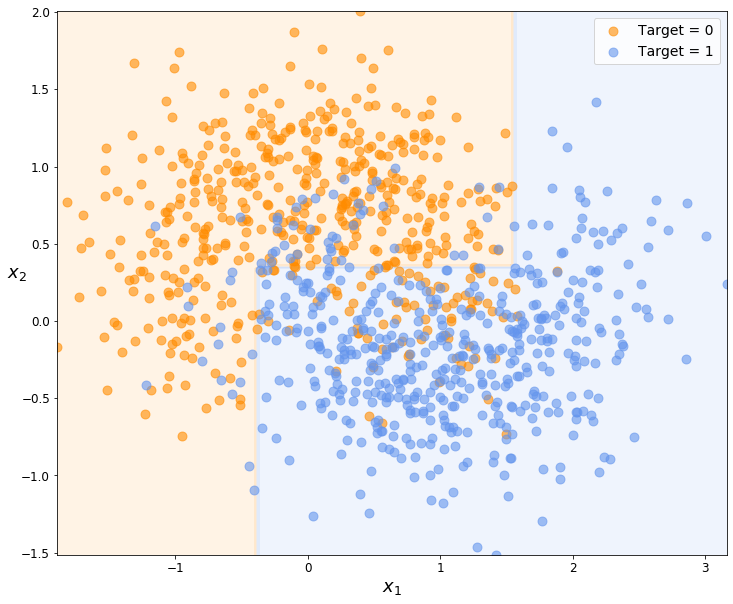

In [12]:
plt.figure(figsize=(12, 10))
plot_decision_boundary(tree_clf, mm[0], mm[1])

## Grid search with cross validation

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': list(range(1, 5)), 'max_leaf_nodes': list(range(2, 8)), 'min_samples_split': list(range(2, 8))}
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7],
                         '

In [15]:
print(grid_search.best_params_)
best_fit = grid_search.best_estimator_

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}


In [16]:
cvres = grid_search.cv_results_
# print(cvres.keys())
best_fit_models = [(np.sqrt(-mean_score), params) for mean_score, params in zip(cvres['mean_test_score'], cvres['params'])]
best_fit_models.sort(key=lambda x: x[0], reverse=False)
print(f'List of best-fit models sorted by RMSE:')
for rmse, params in best_fit_models[:10]:
    print(f'{rmse:<16.15f} {params}')

List of best-fit models sorted by RMSE:
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 3}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 4}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 5}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 6}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 7}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 2}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 3}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 4}
0.379849594294524 {'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_split': 5}


Let's compute the accuracy now.

In [17]:
from sklearn.metrics import accuracy_score
y_pred = best_fit.predict(X_test)
print(f'Accuracy for the best-fit model: {accuracy_score(y_test, y_pred):.5f}')

Accuracy for the best-fit model: 0.85667
